In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정을 위한 코드입니다.
# 사용하시는 환경에 따라 'NanumGothic' 또는 'Malgun Gothic' 등으로 변경해야 할 수 있습니다.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

# -----------------------------------------------------------
# 1. 데이터 불러오기 및 기본 정보 확인
# -----------------------------------------------------------

try:
    # CSV 파일을 pandas 데이터프레임으로 읽어옵니다.
    df = pd.read_csv('C:\\Users\\opgrs\\OneDrive\\Desktop\\final_project\\backend\\ai_model\\car.csv')

    print("--- 데이터 첫 5행 미리보기 ---")
    print(df.head())
    print("\n--- 데이터 정보 요약 ---")
    df.info()
    print("\n--- 수치형 데이터 기술 통계 ---")
    print(df.describe())
    print("\n--- 결측치 확인 ---")
    print(df.isnull().sum())
except FileNotFoundError:
    print("오류: 'car_practice - car.csv' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")


--- 데이터 첫 5행 미리보기 ---
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

--- 데이터 정보 요약 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int

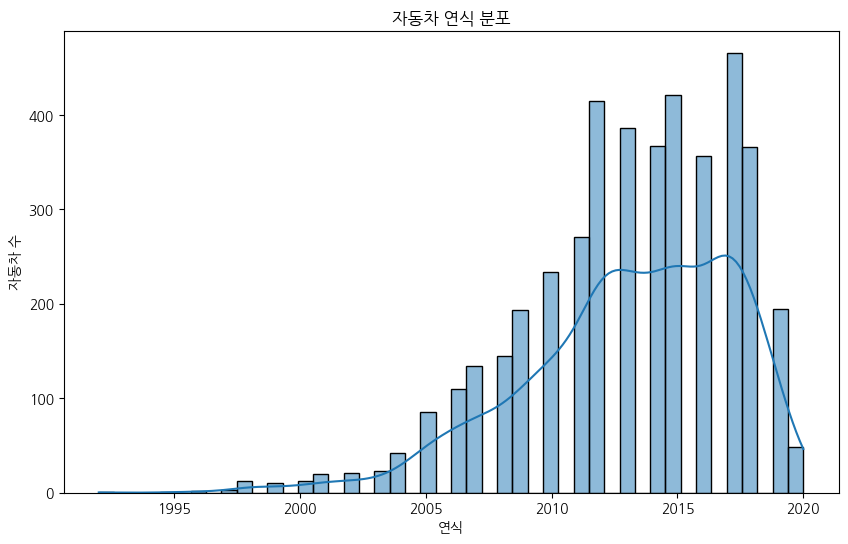

In [7]:
#years 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['year'],kde=True)
plt.title('자동차 연식 분포')
plt.xlabel('연식')
plt.ylabel('자동차 수')
plt.show()

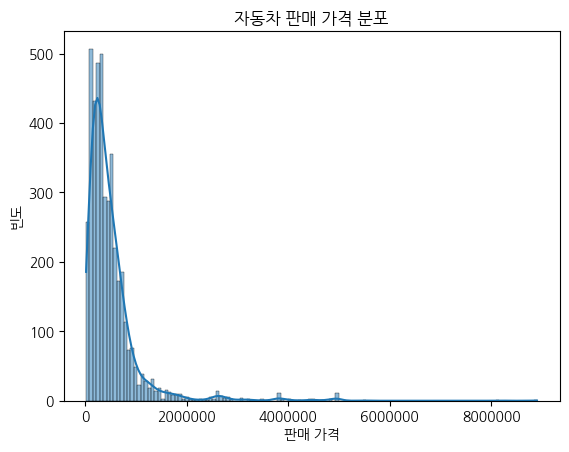

In [ ]:
plt.Figure(figsize=(10,6))
sns.histplot(df['selling_price'],kde=True)
plt.title('자동차 판매 가격 분포')
plt.xlabel('판매 가격')
plt.ylabel('빈도')

#표기법을 다르게
plt.ticklabel_format(style='plain',axis='x')

plt.show()

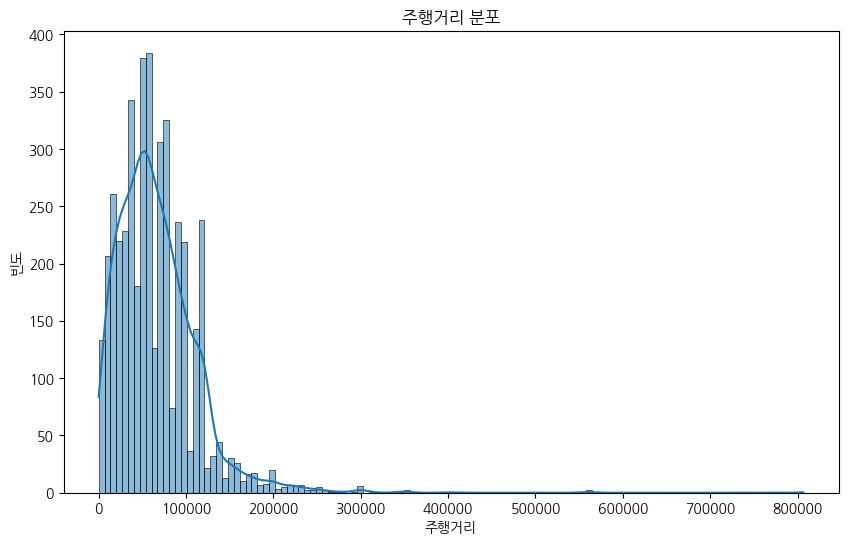

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['km_driven'],kde=True)
plt.title('주행거리 분포')
plt.xlabel('주행거리')
plt.ylabel('빈도')
plt.show()

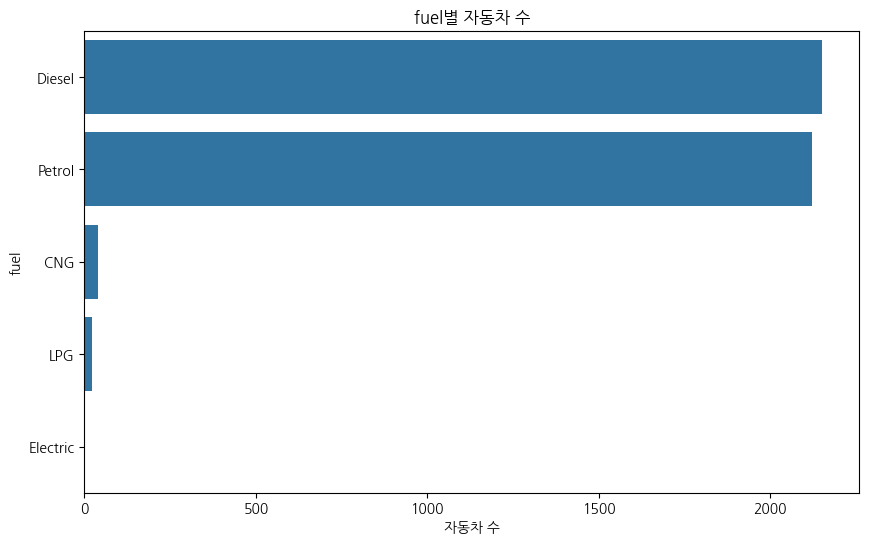

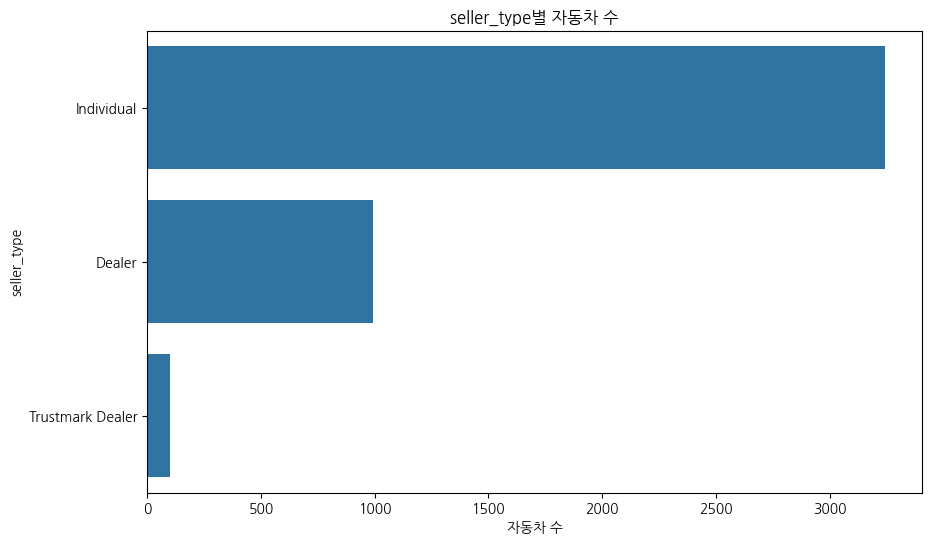

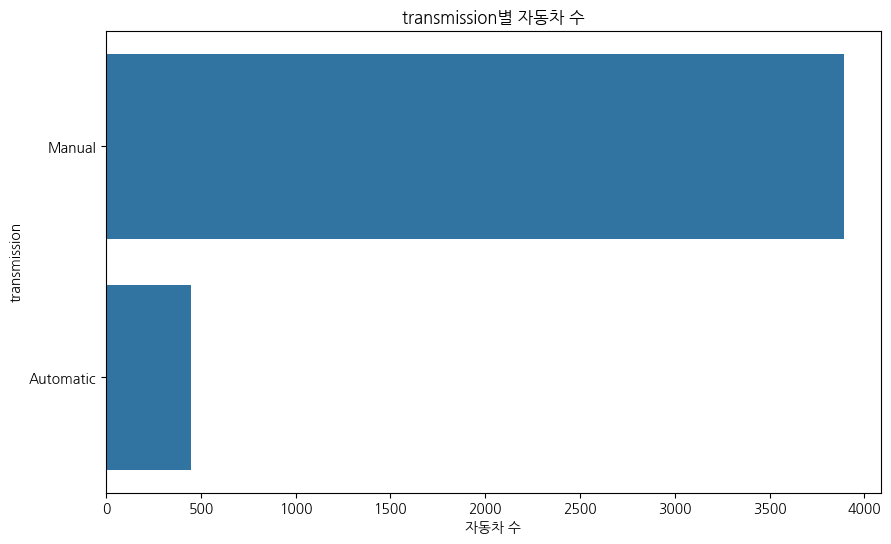

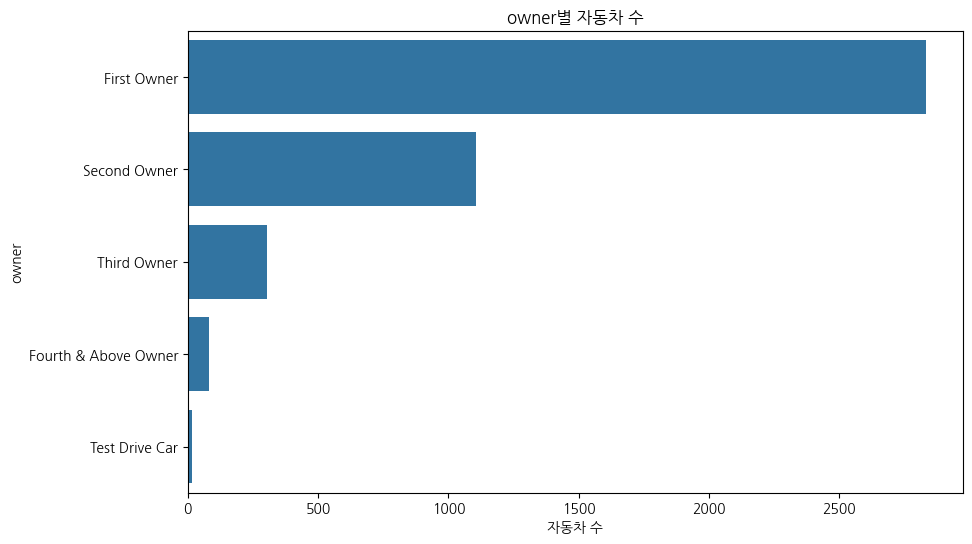

In [12]:
categorical_features = ['fuel','seller_type','transmission','owner']

for f in categorical_features:
    plt.figure(figsize=(10,6))

    #데이터가 많은 순서대로 정렬하여 표시
    sns.countplot(y=f, data=df, order=df[f].value_counts().index)
    plt.title(f'{f}별 자동차 수')
    plt.xlabel('자동차 수')
    plt.ylabel(f)
    plt.show()

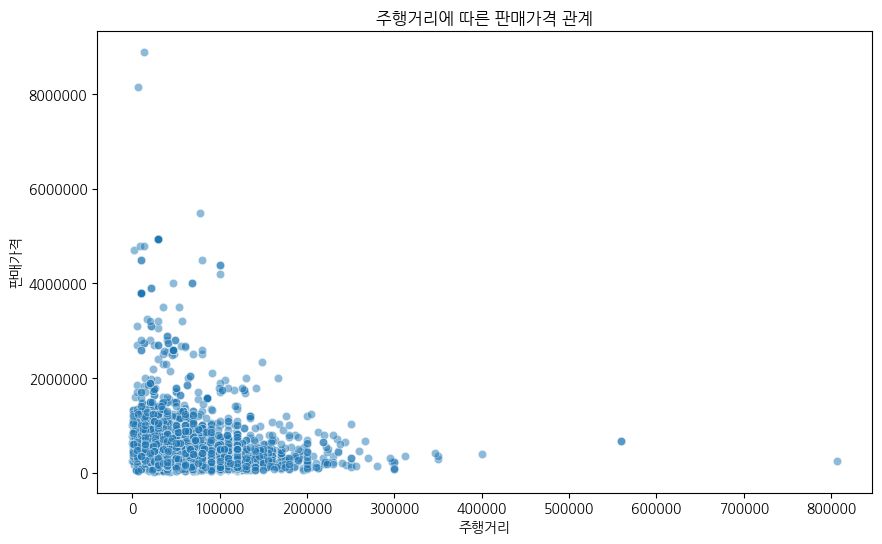

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='km_driven',y='selling_price',data=df,alpha=0.5)
plt.title('주행거리에 따른 판매가격 관계')
plt.xlabel('주행거리')
plt.ylabel('판매가격')
#표기법을 다르게
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [15]:
categorical_features=['fuel','transmission','owner','seller_type']

for f in categorical_features:

SyntaxError: incomplete input (2654927081.py, line 3)

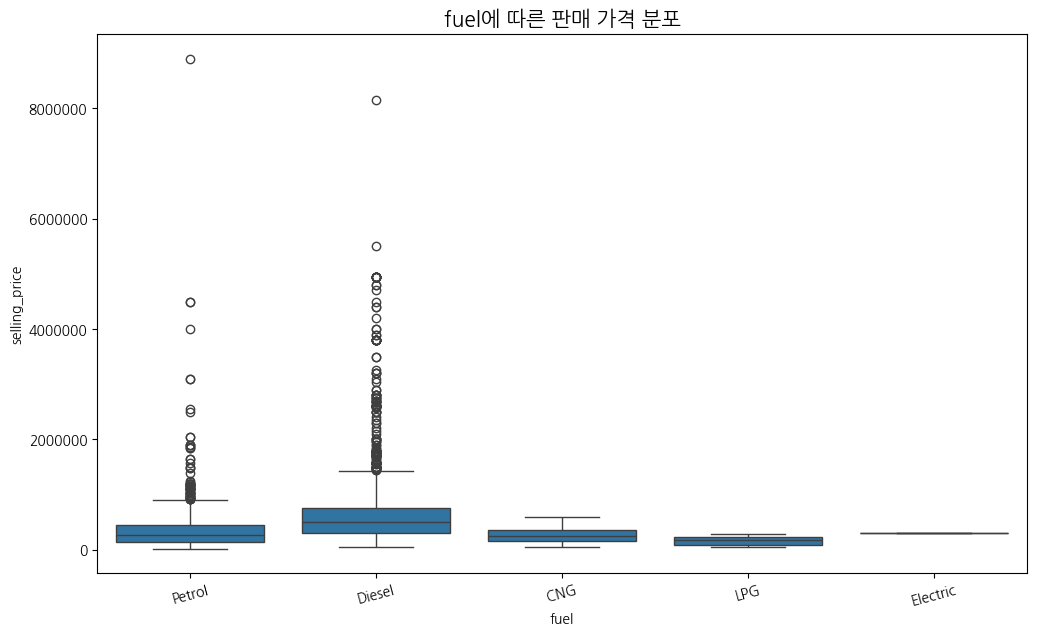

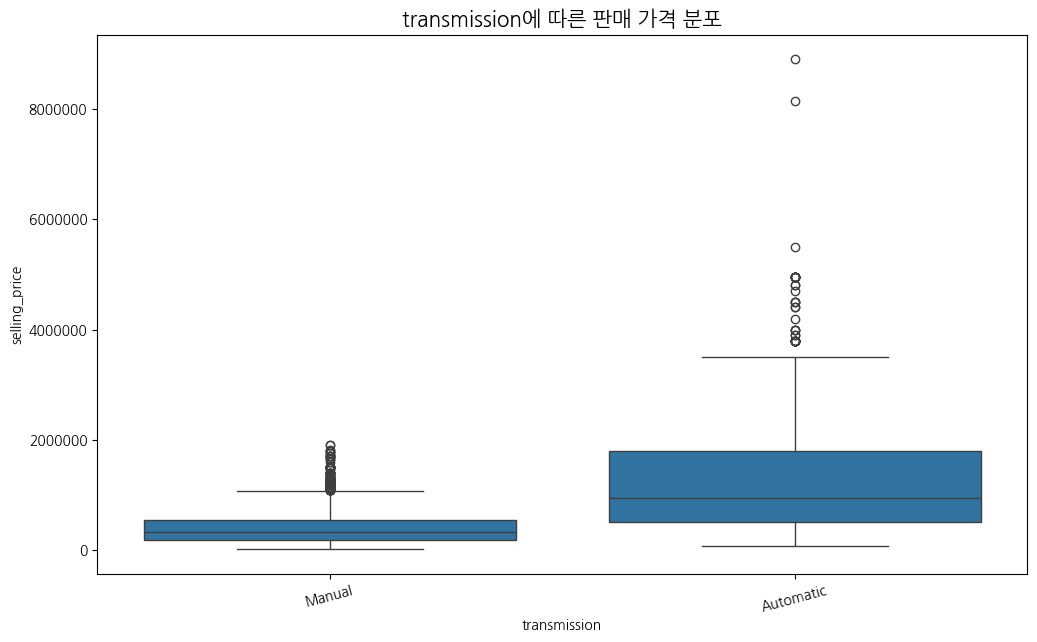

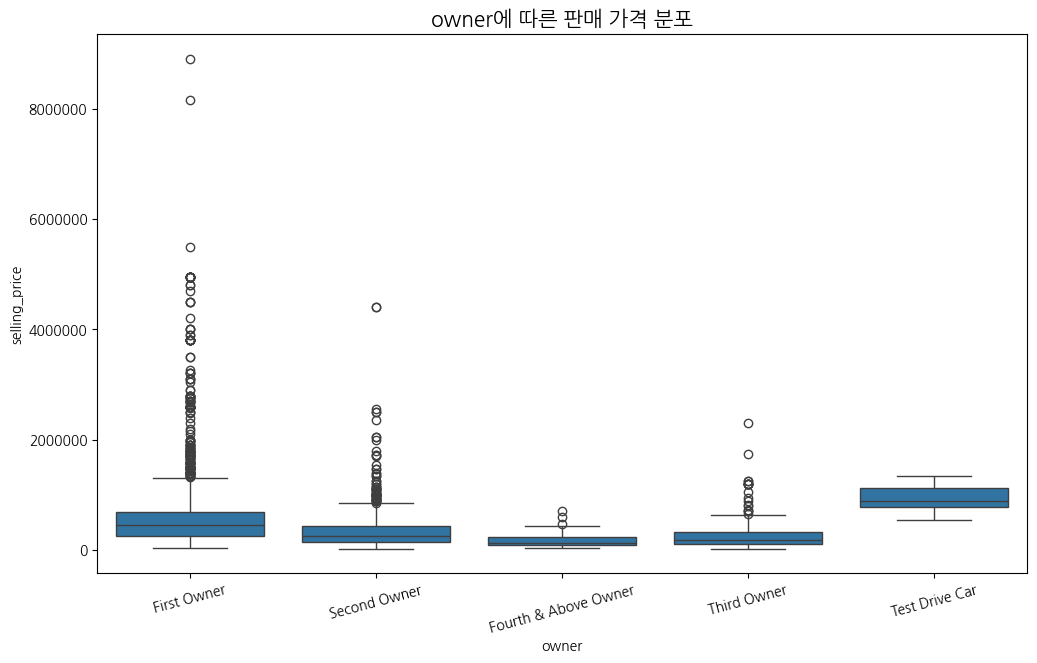

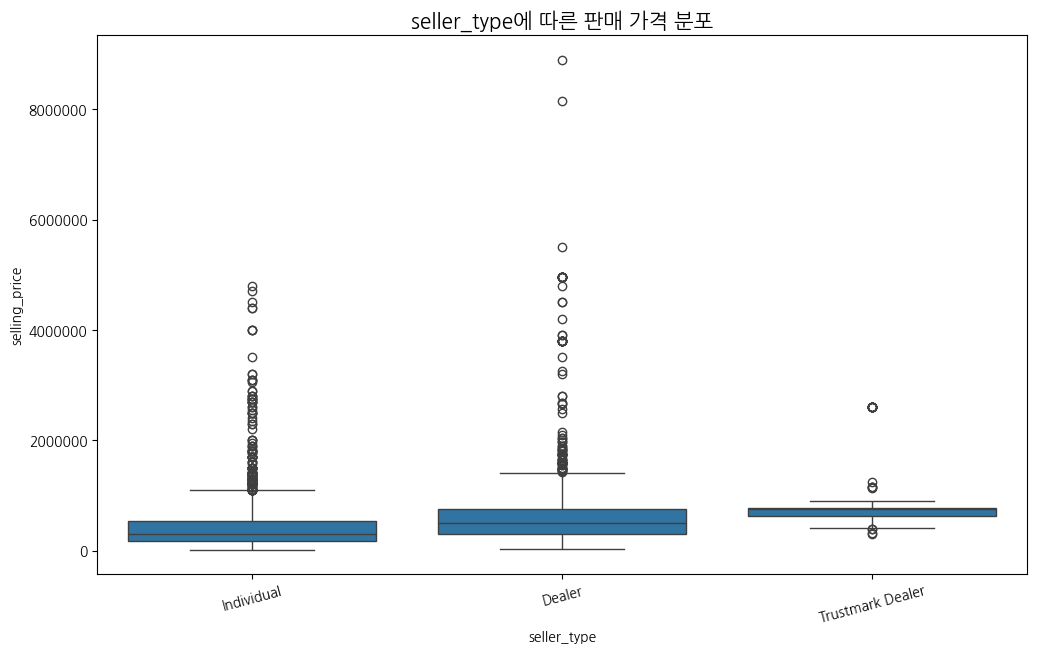

In [16]:
categorical_features=['fuel','transmission','owner','seller_type']

for f in categorical_features:
    plt.figure(figsize=(12,7))
    sns.boxplot(x=f, y='selling_price',data=df)
    plt.title(f'{f}에 따른 판매 가격 분포',fontsize=15)
    plt.ticklabel_format(style='plain',axis='y')
    plt.xticks(rotation=15)
    plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


df = pd.read_csv('car.csv')


In [27]:
# 데이터 전처리 및 모델 파이프라인 구축
# 예측에 사용할 특성(x)과 목표 변수를 정의하고 name,year 대체되었으므로 제외
current_year = 2024
df['car_age'] = current_year - df['year']

X = df[['km_driven','fuel','seller_type','transmission','owner','car_age']]
y = df['selling_price']

one_hot_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',one_hot_encoder,categorical_features)
    ],
    remainder='passthrough'
)

# 모델 학습: 랜덤 포레스트 모델 사용
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델을 학습
model.fit(X_train, y_train)


# 예측 및 결과 확인
prediction = model.predict(X_test)

sample_car = X_test.iloc[[10]]
actual_price = y_test.iloc[10]
predicted_price = model.predict(sample_car)[0]

print("\n---감가상각 예측 결과샘플---")
print("선택된 자동차의 정보:")
print(sample_car)
print(f"\n>> 실제 판매 가격: {actual_price:,.0f}")
print(f">>모델의 예측 판매 가격: {predicted_price:,.0f}")



# 모델의 전체적인 성능을 r-square&rm 점수로 평가
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test, prediction)
rmse = math.sqrt(mse)     # 또는 (mse ** 0.5)
print(f"MAE: {mae:,.0f}, RMSE: {rmse:,.0f}")

r2 = r2_score(y_test,prediction)
print(f'\n 모델의 예측 정확도: {r2:.2f}')




---감가상각 예측 결과샘플---
선택된 자동차의 정보:
      km_driven    fuel seller_type transmission        owner  car_age
3827      58000  Diesel      Dealer       Manual  First Owner        9

>> 실제 판매 가격: 511,000
>>모델의 예측 판매 가격: 490,178
MAE: 168,487, RMSE: 390,751

 모델의 예측 정확도: 0.50


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error


# 데이터 불러오기
df = pd.read_csv('car.csv')

# --- 1. 시간 기반으로 학습/테스트 데이터 분리 ---
split_year = 2018
train_df = df[df['year'] <= split_year].copy()
test_df = df[df['year'] > split_year].copy()

print(f"학습 데이터: ~{split_year}년 ({len(train_df)}개)")
print(f"테스트 데이터: {split_year+1}년~ ({len(test_df)}개)")

current_year_past = 2018
train_df['car_age'] = current_year_past - train_df['year']
test_df['car_age'] = current_year_past - test_df['year']

# 예측에 사용할 특성(X)과 목표 변수(y) 정의
features = ['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'car_age']
X_train = train_df[features]
y_train = train_df['selling_price']
X_test = test_df[features]
y_test = test_df['selling_price']

# 이전과 동일한 모델 파이프라인 사용
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor = ColumnTransformer(
    transformers=[('cat', one_hot_encoder, categorical_features)],
    remainder='passthrough'
)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# **오직 과거 데이터(train_df)로만 모델 학습**
model.fit(X_train, y_train)
print("\n과거 데이터(2018년 이전)로 모델 학습을 완료했습니다.")


# 학습된 모델로 미래(2019년 이후) 데이터 예측
future_predictions = model.predict(X_test)

# 성능 평가
r2 = r2_score(y_test, future_predictions)
mae = mean_absolute_error(y_test, future_predictions)

print(f"\n--- 미래(2019년 이후) 데이터 예측 성능 ---")
print(f"예측 정확도(R-squared): {r2:.2f}")
print(f"평균 절대 오차(MAE): {mae:,.0f} (예측값과 실제값의 평균 차이)")

# 결과 비교를 위해 샘플 1개 추출
sample_future_car = X_test.iloc[[5]]
actual_future_price = y_test.iloc[5]
predicted_future_price = model.predict(sample_future_car)[0]

print("\n--- 미래 예측 결과 샘플 ---")
print("선택된 미래 자동차의 정보:")
print(sample_future_car)
print(f"\n>> 실제 판매 가격: {actual_future_price:,.0f}")
print(f">> 모델의 예측 판매 가격: {predicted_future_price:,.0f}")

학습 데이터: ~2018년 (4097개)
테스트 데이터: 2019년~ (243개)

과거 데이터(2018년 이전)로 모델 학습을 완료했습니다.

--- 미래(2019년 이후) 데이터 예측 성능 ---
예측 정확도(R-squared): 0.40
평균 절대 오차(MAE): 439,907 (예측값과 실제값의 평균 차이)

--- 미래 예측 결과 샘플 ---
선택된 미래 자동차의 정보:
     km_driven    fuel seller_type transmission        owner  car_age
158     120000  Petrol  Individual       Manual  First Owner       -2

>> 실제 판매 가격: 240,000
>> 모델의 예측 판매 가격: 313,615


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score


df = pd.read_csv('car.csv')

df['brand'] = df['name'].apply(lambda x: x.split(' ')[0])

train_df = df[df['year'] <= split_year].copy()
test_df = df[df['year'] > split_year].copy()

current_year_past = 2018
train_df['car_age'] = current_year_past - train_df['year']
test_df['car_age'] = current_year_past - test_df['year']

# 'brand'를 예측 특성에 추가
features = ['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'car_age', 'brand']
X_train = train_df[features]
y_train = train_df['selling_price']
X_test = test_df[features]
y_test = test_df['selling_price']

# 'brand'를 원-핫 인코딩 대상에 추가
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor = ColumnTransformer(
    transformers=[('cat', one_hot_encoder, categorical_features)],
    remainder='passthrough'
)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

model.fit(X_train, y_train)

print("\n--- 미래 예측 결과 샘플 ---")
print("선택된 미래 자동차의 정보:")
print(sample_future_car)
print(f"\n>> 실제 판매 가격: {actual_future_price:,.0f}")
print(f">> 모델의 예측 판매 가격: {predicted_future_price:,.0f}")


future_predictions = model.predict(X_test)
r2 = r2_score(y_test, future_predictions)

print(f"--- 'brand' 특성 추가 후 미래 예측 성능 ---")
print(f"개선된 모델의 예측 정확도(R-squared): {r2:.2f}")


--- 미래 예측 결과 샘플 ---
선택된 미래 자동차의 정보:
     km_driven    fuel seller_type transmission        owner  car_age
158     120000  Petrol  Individual       Manual  First Owner       -2

>> 실제 판매 가격: 240,000
>> 모델의 예측 판매 가격: 313,615
--- 'brand' 특성 추가 후 미래 예측 성능 ---
개선된 모델의 예측 정확도(R-squared): 0.57


In [14]:
%pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------- ----------- 1.0/1.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.1 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score



df = pd.read_csv('car.csv')
df['brand'] = df['name'].apply(lambda x: x.split(' ')[0])


split_year = 2018
train_df = df[df['year'] <= split_year].copy()
test_df = df[df['year'] > split_year].copy()

current_year_past = 2018
train_df['car_age'] = current_year_past - train_df['year']
test_df['car_age'] = current_year_past - test_df['year']


features = ['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'car_age', 'brand']
X_train = train_df[features]
y_train = train_df['selling_price']
X_test = test_df[features]
y_test = test_df['selling_price']

# 모델 파이프라인 구축
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor = ColumnTransformer(
transformers=[('cat', one_hot_encoder, categorical_features)],
remainder='passthrough'
)
model = Pipeline(steps=[('preprocessor', preprocessor),
                    ('regressor', lgb.LGBMRegressor(random_state=42))])


model.fit(X_train, y_train)

# 모델 평가
future_predictions = model.predict(X_test)
r2 = r2_score(y_test, future_predictions)

print(f"--- LightGBM 모델의 미래 예측 성능 ---")
print(f"모델의 예측 정확도(R-squared): {r2:.2f}\n")


# 테스트 데이터셋에서 10번째 자동차를 샘플로 선택
sample_index = 10
sample_car = X_test.iloc[[sample_index]]
actual_price = y_test.iloc[sample_index]
predicted_price = model.predict(sample_car)[0]

print("--- 예측 결과 샘플 ---")
print("선택된 자동차의 정보:")
print(sample_car)
print(f"\n>> 실제 판매 가격: {actual_price:,.0f}")
print(f">> 모델의 예측 판매 가격: {predicted_price:,.0f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 4097, number of used features: 32
[LightGBM] [Info] Start training from score 474033.815231
--- LightGBM 모델의 미래 예측 성능 ---
모델의 예측 정확도(R-squared): 0.59

--- 예측 결과 샘플 ---
선택된 자동차의 정보:
     km_driven    fuel seller_type transmission        owner  car_age    brand
253      11240  Petrol  Individual       Manual  First Owner       -1  Hyundai

>> 실제 판매 가격: 800,000
>> 모델의 예측 판매 가격: 552,149


c:\Users\opgrs\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\opgrs\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [19]:
import pandas as pd
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV # GridSearchCV를 불러옵니다.
from sklearn.metrics import r2_score


df = pd.read_csv('car.csv')
df['brand'] = df['name'].apply(lambda x: x.split(' ')[0])

split_year = 2018
train_df = df[df['year'] <= split_year].copy()
test_df = df[df['year'] > split_year].copy()

current_year_past = 2018
train_df['car_age'] = current_year_past - train_df['year']
test_df['car_age'] = current_year_past - test_df['year']

features = ['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'car_age', 'brand']
X_train = train_df[features]
y_train = train_df['selling_price']
X_test = test_df[features]
y_test = test_df['selling_price']

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor = ColumnTransformer(
    transformers=[('cat', one_hot_encoder, categorical_features)],
    remainder='passthrough'
)

# 모델 파이프라인 정의
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', lgb.LGBMRegressor(random_state=42))])

# --- 하이퍼파라미터 튜닝 설정 ---
# 테스트할 하이퍼파라미터 후보 값들을 정의합니다.
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [5, 10]
}

# GridSearchCV 설정
# cv=3은 데이터를 3개로 나눠 교차 검증한다는 의미입니다.
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)

# --- 튜닝 실행 ---
print("하이퍼파라미터 튜닝을 시작합니다. (시간이 다소 소요될 수 있습니다)")
grid_search.fit(X_train, y_train)

# --- 결과 확인 ---
print("\n튜닝이 완료되었습니다.")
print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")

# 최적의 모델로 예측 및 평가
best_model = grid_search.best_estimator_
future_predictions = best_model.predict(X_test)
r2 = r2_score(y_test, future_predictions)

print(f"\n--- 튜닝 후 LightGBM 모델의 최종 성능 ---")
print(f"최종 모델의 예측 정확도(R-squared): {r2:.2f}\n")

sample_index = 10
sample_car = X_test.iloc[[sample_index]]
actual_price = y_test.iloc[sample_index]

# 최적화된 best_model을 사용하여 예측합니다.
predicted_price = best_model.predict(sample_car)[0]

print("--- 최종 모델의 예측 결과 샘플 ---")
print("선택된 자동차의 정보:")
print(sample_car)
print(f"\n>> 실제 판매 가격: {actual_price:,.0f}")
print(f">> 모델의 예측 판매 가격: {predicted_price:,.0f}")


하이퍼파라미터 튜닝을 시작합니다. (시간이 다소 소요될 수 있습니다)
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 4097, number of used features: 32
[LightGBM] [Info] Start training from score 474033.815231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

c:\Users\opgrs\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\opgrs\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
